In [ ]:
import numpy as np
import os, cv2, itertools
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D

In [ ]:
# np.savez_compressed('cats_dogs', X_train, X_test, y_train, y_test )
# X (nx x m), Y (1xm)
data = np.load('cats_cnn.npz') # cats = 1 output, dogs = 0

In [ ]:
data.files

['arr_0', 'arr_1', 'arr_2', 'arr_3']

In [ ]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)

In [ ]:
X_train = data['arr_0']
X_test = data['arr_1']
Y_train = data['arr_2']
Y_test = data['arr_3']

X_train = X_train.reshape(-1, 64, 64, 3) / 255
X_test = X_test.reshape(-1, 64, 64, 3) / 255

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20000, 64, 64, 3)
(5000, 64, 64, 3)
(20000, 1)
(5000, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=10, batch_size=50, validation_split=0.2, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 9216)             

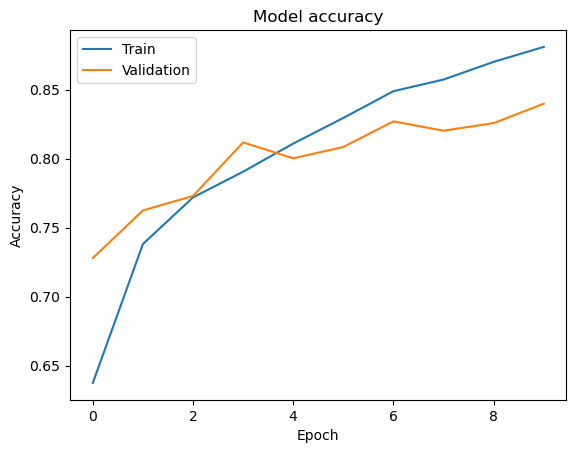

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

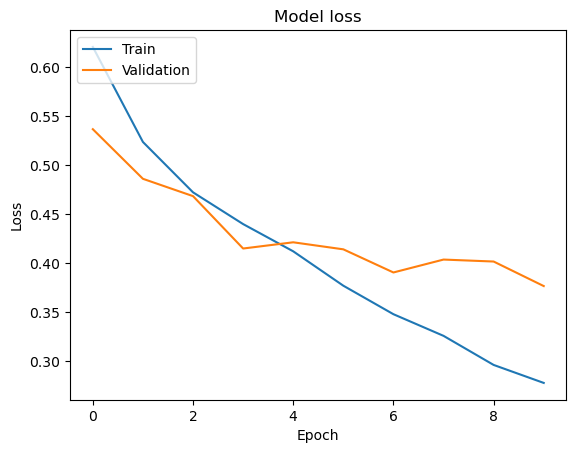

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print("Evaluate on train data")
Yhat = model.predict(X_train)
acc = np.mean(np.rint(Yhat) == Y_train)
print("The train accuracy rate is:", acc * 100)

Evaluate on train data
625/625 [==============================] - 3s 5ms/step
The train accuracy rate is: 90.63


In [ ]:
print("Evaluate on test data")
Yhat_test = model.predict(X_test)
acc = np.mean(np.rint(Yhat_test) == Y_test)
print("The test accuracy rate is:", acc * 100)

Evaluate on test data
157/157 [==============================] - 0s 2ms/step
The test accuracy rate is: 83.98


In [ ]:
def predict_and_display(file_path):
    test_image = read_image(file_path)
    X_img = test_image.reshape(-1, 64, 64, 3) / 255

    prediction = model.predict(X_img)

    if prediction > 0.5:
        print(f'Prediction: CAT with probability {prediction[0][0] * 100:.2f}%')
    else:
        print(f'Prediction: DOG with probability {(1 - prediction[0][0]) * 100:.2f}%')

    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
    plt.show()

1/1 [==============================] - 0s 16ms/step
Prediction: CAT with probability 92.44%


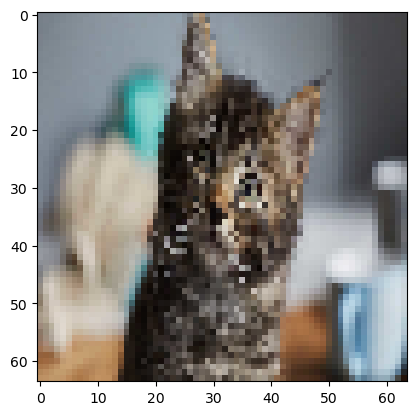

In [ ]:
predict_and_display("cat2.jpg")

1/1 [==============================] - 0s 15ms/step
Prediction: DOG with probability 86.83%


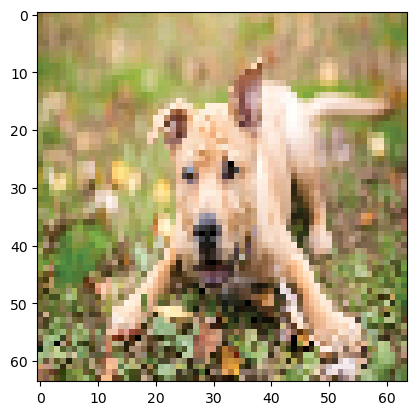

In [ ]:
predict_and_display("dog2.jpg")